### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sigfig
from scipy.integrate import quad


### 2.6

Let's begin by defining a function for the $k$-th Lagrange polynomial.

In [2]:
def lagrange(k, x, nodes):
    
    L_x = 1
    for j in range(len(nodes)):
        if j != k:
            L_x *= (x-nodes[j])/(nodes[k]-nodes[j])

    return L_x


#### a)

Now we can define the Lambda function for computing the Lebesgue number.

In [3]:
def Lambda(m):
    
    nodes = np.linspace(-1,1,m+1)
    x_vals = np.linspace(-1,1,100)
    sums = []
    
    for x in x_vals:
        val = 0
        for j in range(m+1):
            val += abs(lagrange(j, x, nodes))
        sums.append(val)
        
#     plt.plot(x_vals, sums)
#     plt.show()
    
    return max(sums)

In [4]:
print(Lambda(10))

29.897047001679912


#### b)

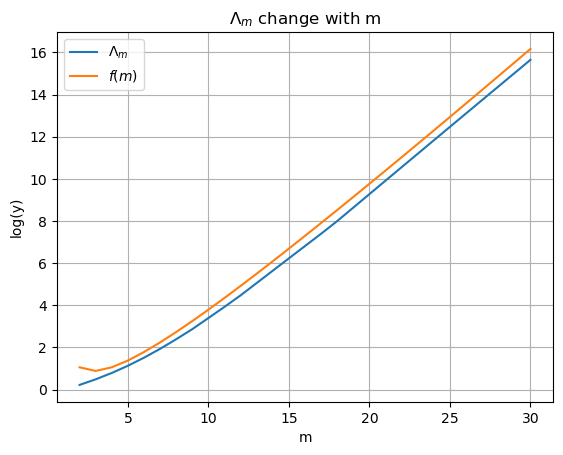

In [5]:
# define function and initialise m values
f_m = lambda m: 2**m/(m*np.log(m))
m_vals = [m for m in range(2, 31)]

# plot Lambda and function against m
plt.plot(m_vals, [np.log(Lambda(m)) for m in m_vals], label='$\Lambda_{m}$')
plt.plot(m_vals, [np.log(f_m(m)) for m in m_vals], label='$f(m)$')
plt.title('$\Lambda_{m}$ change with m')
plt.xlabel('m')
plt.ylabel('log(y)')
plt.legend()
plt.grid()
plt.show()


Note here that for $f(m) = \frac{2^m}{m\log(m)}$, we have that the two curves above are parallel. Since the y-axis is log scaled, this implies that $f(m)$ is some constant scaling of $\Lambda_{m}$...

#### c)

Let's define the new Lambda function with different nodes.

In [6]:
def LambdaC(m):
    
    nodes = np.array([np.cos(np.pi*i/m) for i in range(m+1)])
    x_vals = np.linspace(-1,1,100)
    sums = []
    
    for x in x_vals:
        val = 0
        for j in range(m+1):
            val += abs(lagrange(j, x, nodes))
        sums.append(val)
        
#     plt.plot(x_vals, sums)
#     plt.show()
    
    return max(sums)


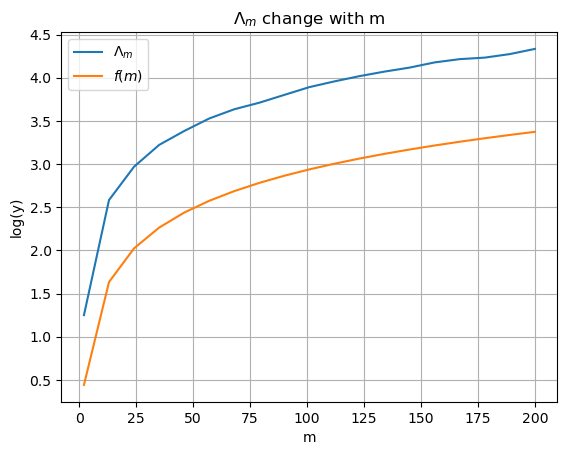

In [7]:
# define function and initialise m values
f_m2 = lambda m: 2*np.log(m)/np.pi
m_vals = [2+11*i for i in range(19)]

# plot Lambda and function against m
plt.plot(m_vals, [LambdaC(m) for m in m_vals], label='$\Lambda_{m}$')
plt.plot(m_vals, [f_m2(m) for m in m_vals], label='$f(m)$')
plt.title('$\Lambda_{m}$ change with m')
plt.xlabel('m')
plt.ylabel('log(y)')
plt.legend()
plt.grid()
plt.show()


This time the curve of $\Lambda_{m}$ is parallel to $f(m) = \frac{2}{\pi}\log(m)$...

### 2.7

In [8]:
af = [2,3,4,56]
afc = af[:-1]
afc,af

([2, 3, 4], [2, 3, 4, 56])

#### a)

In [9]:
def recursive_f(f,nodes):
    if len(nodes) == 1:
        return f(nodes[0])
    val = (recursive_f(f,nodes[1:])-recursive_f(f,nodes[:-1]))/(nodes[-1]-nodes[0])
    return val

In [10]:
print(f'sin[0,1,2,3] = {recursive_f(np.sin,[0,1,2,3])}')
                         

sin[0,1,2,3] = -0.010393219665581396


#### b)

In [11]:
def qk(f, nodes, k, x):
    if k==0:
        return f(nodes[0])
    val = qk(f, nodes, k-1, x) + recursive_f(f,nodes[:k+1])*np.prod([x-i for i in nodes[:k]])
    return val


In [12]:
sd = [0,1,2,3,4]
sd[:6]

[0, 1, 2, 3, 4]

In [13]:
qk(np.arctan,[0,1],5,3)

21.205750411731103

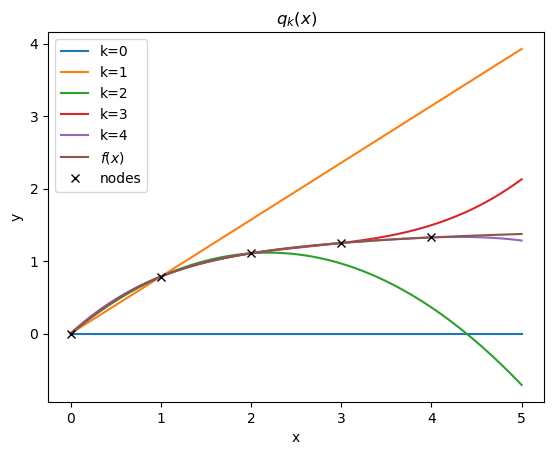

In [14]:
x_vals = np.linspace(0,5,500)
nodes = [0,1,2,3,4]

for k in range(5):
    plt.plot(x_vals, [qk(np.arctan, nodes, k, x) for x in x_vals], label=f'k={k}')
plt.plot(x_vals, np.arctan(x_vals), label='$f(x)$')
plt.plot(nodes, np.arctan(nodes), 'xk', label='nodes')
plt.title('$q_k(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2.8

#### a)

Let's first define the three integral quadrature formulas.

In [15]:
def midpoint(f,a,b):
    return (b-a)*f(0.5*(a+b))
    
def trapezoidal(f,a,b):
    return 0.5*(b-a)*(f(a)+f(b))
    
def simpson(f,a,b):
    return (b-a)/6*(f(a)+4*f(0.5*(a+b))+f(b))


In [16]:
# define function and values
f_x = lambda x: np.exp(2*x)
a, b = -1, 1

# true value of integral
integral = quad(f_x,a,b)[0]
print(f'Value of integral: {integral}')

# make a dataframe of results
df = pd.DataFrame({
    'Method': ['Midpoint', 'Trapezoidal', 'Simpson'], 
    'Value': [midpoint(f_x,a,b), trapezoidal(f_x,a,b), simpson(f_x,a,b)]
})

# compute error and display
df['Error'] = df['Value'].apply(lambda x: sigfig.round(abs(x - integral), sigfigs=3))
display(df)


Value of integral: 3.6268604078470186


,Method,Value,Error
0,Midpoint,2.000000,1.630
1,Trapezoidal,7.524391,3.900
2,Simpson,3.841464,0.215


As we can see, Cavalierie-Simpson produces the most accurate approximation. On the other hand, the Trapezoidal formula is off by over a factor of two.

#### b)

In [17]:
# define function
f_x = lambda x: 1/(1+x)
true_vals, mp_vals, trap_vals, simp_vals = [[] for _ in range(4)]
h_vals = [2**(-k) for k in range(11)]

# formula values
for h in h_vals:
    true_vals.append(quad(f_x, 0, h)[0])
    mp_vals.append(midpoint(f_x, 0, h))
    trap_vals.append(trapezoidal(f_x, 0, h))
    simp_vals.append(simpson(f_x, 0, h))

# error values
mp_errors = abs(np.array(mp_vals) - np.array(true_vals))
trap_errors = abs(np.array(trap_vals) - np.array(true_vals))
simp_errors = abs(np.array(simp_vals) - np.array(true_vals))


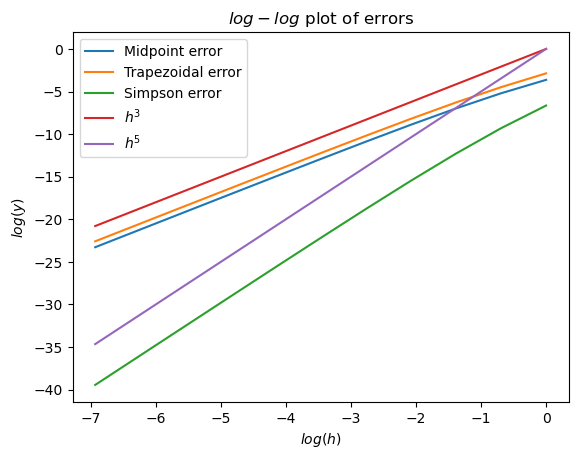

In [18]:
# plot error curves and h^gamme
plt.plot(np.log(h_vals), np.log(mp_errors), label='Midpoint error')
plt.plot(np.log(h_vals), np.log(trap_errors), label='Trapezoidal error')
plt.plot(np.log(h_vals), np.log(simp_errors), label='Simpson error')
plt.plot(np.log(h_vals), [np.log(h**3) for h in h_vals], label='$h^3$')
plt.plot(np.log(h_vals), [np.log(h**5) for h in h_vals], label='$h^5$')

plt.title('$log-log$ plot of errors')
plt.xlabel('$log(h)$')
plt.ylabel('$log(y)$')
plt.legend()
plt.show()


Plotting the error curves for the midpoint, trapezoidal and Cavalierie-Simpson formulae, we see that $h^3$ is parallel to the first two and $h^5$ is parallel to the latter...

#### c)

Like in the lecture notes, we have the EOC $= \frac{1}{log(2)}log(\frac{e^k-1}{e^k})$.

In [19]:
# create initial dataframe
df_eoc = pd.DataFrame({
    'h': h_vals,
    'Midpoint_errors': mp_errors,
    'Trapezoid_errors': trap_errors,
    'Simpson_errors': simp_errors
})

# compute EOCs
df_eoc['Midpoint'] = round(np.log(df_eoc['Midpoint_errors'].shift(1)/df_eoc['Midpoint_errors'])/np.log(2),3)
df_eoc['Trapezoid'] = round(np.log(df_eoc['Trapezoid_errors'].shift(1)/df_eoc['Trapezoid_errors'])/np.log(2),3)
df_eoc['Simpson'] = round(np.log(df_eoc['Simpson_errors'].shift(1)/df_eoc['Simpson_errors'])/np.log(2),3)

# present data
df_eoc.drop(columns=['Midpoint_errors','Trapezoid_errors','Simpson_errors'], inplace=True)
df_eoc


,h,Midpoint,Trapezoid,Simpson
0,1.000000,NaN,NaN,NaN
1,0.500000,2.277,2.344,3.842
2,0.250000,2.568,2.593,4.298
3,0.125000,2.760,2.768,4.606
4,0.062500,2.873,2.875,4.790
5,0.031250,2.935,2.935,4.891
6,0.015625,2.967,2.967,4.945
7,0.007812,2.983,2.983,4.972
8,0.003906,2.992,2.992,4.986
9,0.001953,2.996,2.996,4.993


This matches up with the graphical representation we saw above.